<div style="text-align: right"> Tommy Evans-Barton </div>
<div style="text-align: right"> WR Year 2 Jumps </div>

# EDA of Wide Receiver Data (Univariate)

The purpose of this notebook is to do a technical analysis of the **raw** data that will be used in the main report, along with some justifications for future cleaning approaches. Most of this work will be academic and mainly to perform due diligence, and only useful for deeper dives into the work of this project. Data courtesy of Pro Football Reference and Football Outsiders.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/src')
sys.path.append(TOP_PATH + '/src/viz')

In [5]:
import eda_viz

In [78]:
receivers = pd.read_csv(TOP_PATH + '/data/raw/RECEIVERS.csv')
rec_stats = pd.read_csv(TOP_PATH + '/data/raw/REC_STATS.csv')
adv_stats = pd.read_csv(TOP_PATH + '/data/raw/ADV_REC_STATS.csv')

## Receivers Drafted Data
This data is being used in order to isolate the receivers drafted in the first three rounds from 2010 to 2019, as well as identify which years are their first and second in the league.

In [7]:
receivers.head()

,Rnd,Pick,Tm,Player,Pos,Age,YEAR
0,1,22,DEN,Demaryius Thomas,WR,22,2010
1,1,24,DAL,Dez Bryant,WR,21,2010
2,2,36,KAN,Dexter McCluster,WR,21,2010
3,2,39,TAM,Arrelious Benn,WR,21,2010
4,2,60,SEA,Golden Tate,WR,22,2010


### Feature Types
Initially, it seems that the typing of the receivers data is fairly reasonable, as all numeric data are integers and all other data are strings.

In [8]:
receivers.dtypes

Rnd        int64
Pick       int64
Tm        object
Player    object
Pos       object
Age        int64
YEAR       int64
dtype: object

### Missingness
There seem to be no missing entries for this dataset, which is in line with initial assumptions.

In [9]:
receivers.isnull().mean()

Rnd       0.0
Pick      0.0
Tm        0.0
Player    0.0
Pos       0.0
Age       0.0
YEAR      0.0
dtype: float64

### Categoric Features

#### Team

This data seems to use a fairly standard 3 letter encoding of the teams, with all teams accounted for, including former franchises the St. Louis Rams and the San Diego Chargers, who will probably be combined into their L.A. counterparts.

In [10]:
receivers['Tm'].nunique()

34

In [11]:
receivers['Tm'].value_counts()

PIT    7
TEN    7
ARI    6
DEN    5
BUF    5
HOU    5
CAR    5
SEA    5
CIN    5
PHI    4
SFO    4
STL    4
JAX    4
IND    4
NYG    4
KAN    4
BAL    4
TAM    3
DAL    3
CHI    3
NOR    3
WAS    3
GNB    3
NWE    3
DET    3
MIA    3
NYJ    3
ATL    2
SDG    2
MIN    2
CLE    2
LAR    1
LAC    1
OAK    1
Name: Tm, dtype: int64

### Distribution of Numeric Features

#### Rounds
Over the three rounds, the number of receivers selected increases by round. However, there are more picks in the third round, due to compensatory selections, which will also affect the distribution of receivers by pick in the chart that follows this one.

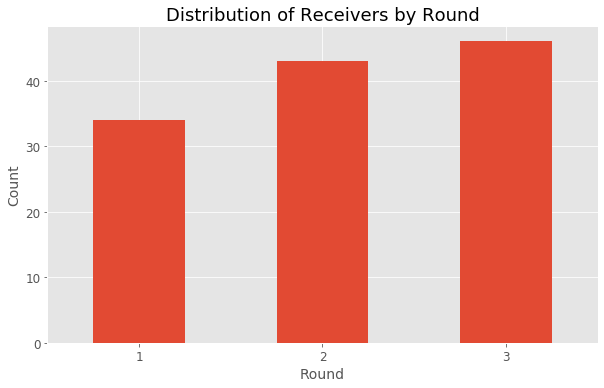

In [12]:
eda_viz.round_distribution(savefig = True)

#### Picks
In terms of the distribution of receivers drafted by 10 picks, there is an odd dip in the middle of each round, i.e. around the 11th to 20th pick of each round with spikes at the beginning and end of rounds. However, while interesting in it's own right, this will not be have an effect on this analysis.

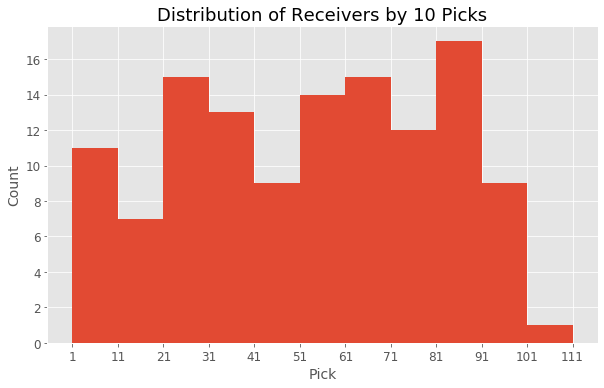

In [13]:
eda_viz.pick_distribution(savefig = True)

#### Age
The distribution of the ages of the players is as expected: a fairly normal distribution with a peak at 22 years old, a fairly standard age to be finishing college at.

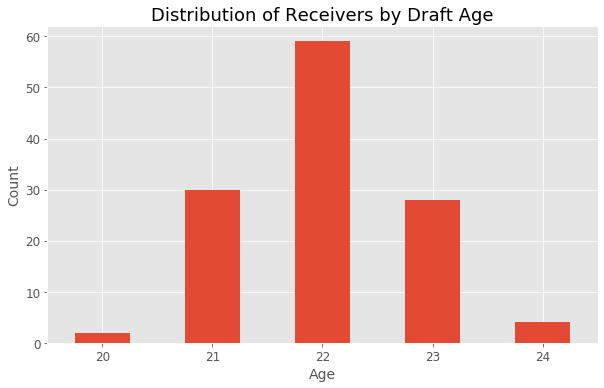

In [14]:
eda_viz.age_distribution(savefig = True)

## Receiver Stats Data
These fairly standard statistics (courtesy of Pro Football Reference) for receivers will be used for the projections of second year jumps. They will need to be trimmed down to only the rookie and second year players for each year. (*Note:* a Glossary of this dataset's features is available in the reference section)

In [75]:
rec_stats.head()

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
0,Roddy White*+,ATL,29,WR,16,16,179,115,64.2%,1389,12.1,10,73,46,7.8,7.2,86.8,1,2010
1,Reggie Wayne*+,IND,32,WR,16,16,175,111,63.4%,1355,12.2,6,72,50,7.7,6.9,84.7,1,2010
2,Santana Moss,WAS,31,WR,16,16,145,93,64.1%,1115,12.0,6,61,56,7.7,5.8,69.7,3,2010
3,Larry Fitzgerald*,ARI,27,WR,16,15,173,90,52.0%,1137,12.6,6,58,41,6.6,5.6,71.1,0,2010
4,Andre Johnson *,HOU,29,WR,13,13,138,86,62.3%,1216,14.1,8,59,60,8.8,6.6,93.5,1,2010


### Feature Types
For the typing of our features, while the `Catch Percentage` column is a string and will need to be converted to a float, the rest of the features are in the correct format for analysis. Additionally, on viewing the `Player Name` column, there will need to be some slight cleaning of extra characters.

In [79]:
rec_stats.dtypes

Player     object
Tm         object
Age         int64
Pos        object
G           int64
GS          int64
Tgt       float64
Rec         int64
Ctch%      object
Yds         int64
Y/R       float64
TD          int64
1D          int64
Lng         int64
Y/Tgt     float64
R/G       float64
Y/G       float64
Fmb         int64
YEAR        int64
dtype: object

### Missingness
The only column that has a substantial amount of missing variables is the Position column, and since we will later be merging on a list of only receivers, it won't matter.

In [83]:
rec_stats.isnull().mean()

Player    0.000000
Tm        0.000000
Age       0.000000
Pos       0.731476
G         0.000000
GS        0.000000
Tgt       0.000889
Rec       0.000000
Ctch%     0.000000
Yds       0.000000
Y/R       0.000000
TD        0.000000
1D        0.000000
Lng       0.000000
Y/Tgt     0.000889
R/G       0.000000
Y/G       0.000000
Fmb       0.000000
YEAR      0.000000
dtype: float64

### Categorical Features

#### Team
This data seems to use a similar 3 character encoding of the teams as described previously. When the team encodings in this dataset are compared to the drafted receivers dataset, it can be seen that they are the same, and therefore won't need to be changed.

In [18]:
rec_stats['Tm'].nunique()

34

In [19]:
rec_stats['Tm'].value_counts()

NOR    33
IND    32
SEA    31
GNB    31
MIN    31
KAN    30
NYG    30
DET    30
PIT    30
MIA    29
NYJ    29
CHI    29
PHI    29
JAX    29
WAS    29
BUF    28
ARI    28
CAR    28
CIN    28
TEN    27
CLE    27
DEN    27
NWE    27
HOU    27
TAM    26
SFO    26
OAK    26
BAL    24
DAL    23
ATL    23
SDG    20
STL    18
LAR    14
LAC     7
Name: Tm, dtype: int64

In [20]:
set(receivers['Tm']) - set(rec_stats['Tm'])

set()

In [21]:
set(rec_stats['Tm']) - set(receivers['Tm'])

set()

#### Position
Since every position in the receivers data is WR the nulls don't matter, and this column may just end up being dropped.

In [84]:
rec_stats['Pos'].value_counts(dropna = False)

NaN    2468
WR      708
wr      198
Name: Pos, dtype: int64

### Distribution of Numeric Features

#### Games
Most players played in the majority of games, with none playing in 0-3 games, possibly due to an artifact of the source not recording information for those players who never played.

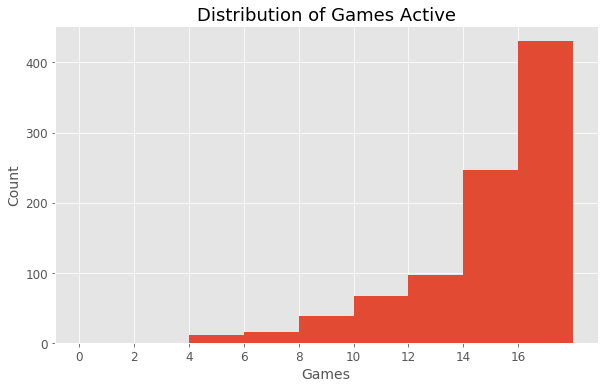

In [23]:
eda_viz.game_distribution(savefig = True)

#### Games Started
Interestingly, while the Games feature is far more dense at the top of its range, the games started distribution seems to be a far more uniform distribution from 4 to 16. There is also an interesting outlier in the 0-1 bin, which upon further inspection is Colts receiver T.Y. Hilton. What is even more interesting is that despite only being credited with one start, he still put up 861 yards and 50 receptions. This high usage despite low start numbers may be due to the fact that Hilton mainly plays in the slot, which, while heavily used in the modern game, traditionally had not been viewed as a starting role until recently.

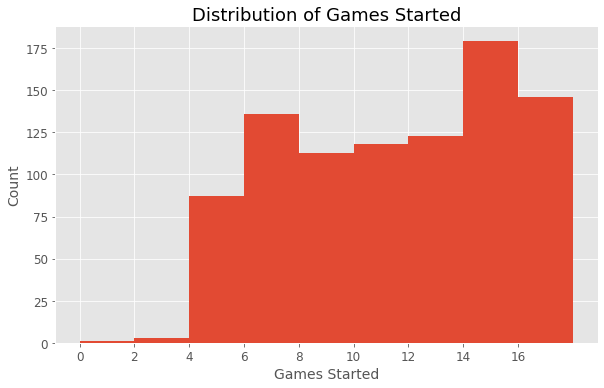

In [24]:
eda_viz.gs_distribution(savefig = True)

In [25]:
rec_stats[rec_stats['GS'] < 2]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
219,T.Y. Hilton,IND,23,wr,15,1,90,50,55.6%,861,17.2,7,30,61,9.6,3.3,57.4,1,2012


#### Targets
Targets seems to be a fairly normal distribution with a right skew, which makes sense as the floor has a hard cap. This distribution has a peak at around 75, and also has a very large outlier in the 200 range. Upon further investigation, there are 2 receivers who have ever put up 200 receptions in a single season (Calvin Johnson and Julio Jones), both of whom put up historical seasons in these years.

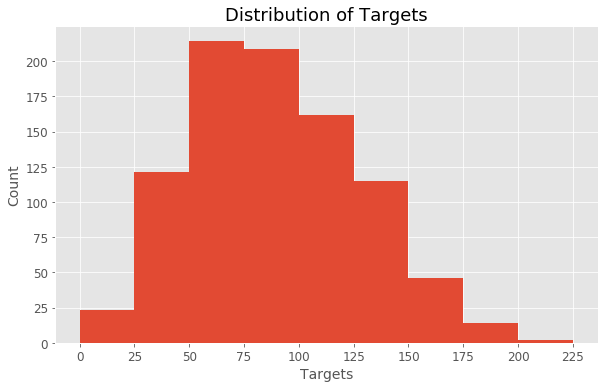

In [26]:
eda_viz.tgt_distribution(savefig = True)

In [27]:
rec_stats[rec_stats['Tgt'] >= 200]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
172,Calvin Johnson *+,DET,27,WR,16,16,204,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012
436,Julio Jones *+,ATL,26,WR,16,16,203,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015


#### Receptions
The Receptions distribution has a very similar shape to the Targets (with a peak around 50 receptions) which intuitively makes some sense. There is one rather large outlier, and upon inspection that is Michael Thomas, who broke the record for receptions in a season in 2019.

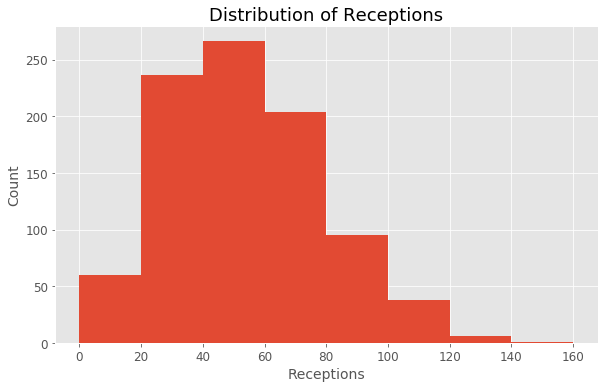

In [28]:
eda_viz.rec_distribution(savefig = True)

In [29]:
rec_stats[rec_stats['Rec'] >= 140]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
812,Michael Thomas*+,NOR,26,WR,16,15,185,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1,2019


#### Catch Rate
The Catch Rate of each receiver has a fairly tight normal distribution, with a peak around 60%. There is also one large outlier, Lee Smith, who had a catch rate of 100%, but on only 4 targets. This outlier may lead us to creating a floor for a required number of targets in order to qualify for catch rate.

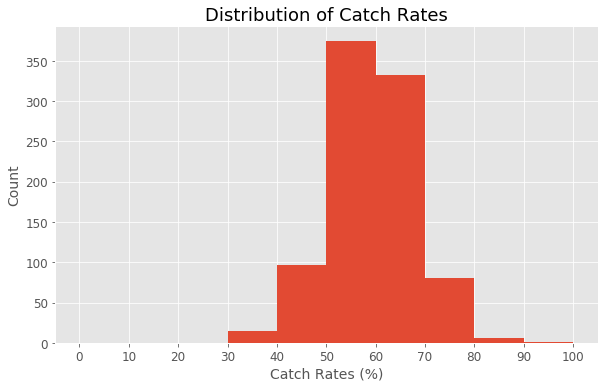

In [30]:
eda_viz.ctr_distribution(savefig = True)

In [31]:
rec_stats[pd.to_numeric(rec_stats['Ctch%'].str.replace('%', '')) >= 90]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
255,Lee Smith,BUF,25,wr,16,7,4,4,100.0%,13,3.3,2,3,5,3.3,0.3,0.8,0,2012


#### Yards
The Yards distribution again follows the patterns of the Receptions and Targets distributions (this makes sense that they would be related), with a peak at around 500. There are a few outliers (Calvin Johnson's and Julio Jones's seasons that were mentioned previously, as well as a very prolific Antonio Brown season), but none that need to be corrected or that will dramatically affect an analysis.

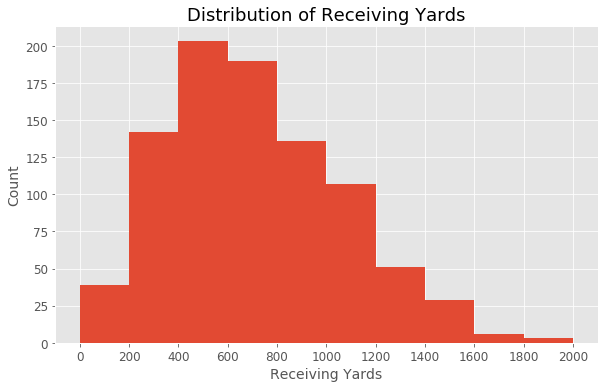

In [32]:
eda_viz.yards_distribution(savefig = True)

In [33]:
rec_stats[rec_stats['Yds'] >= 1800]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
172,Calvin Johnson *+,DET,27,WR,16,16,204,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012
435,Antonio Brown *+,PIT,27,WR,16,16,193,136,70.5%,1834,13.5,10,84,59,9.5,8.5,114.6,3,2015
436,Julio Jones *+,ATL,26,WR,16,16,203,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015


#### Yards per Reception
Yards per Reception displays a fairly tight normal distribution with a peak in the 12-13 range, and outliers on both ends of the spectrum. On the upper end, there's one part-time starter (Joe Morgan), who had very low target numbers, as well as two deep threats in Ladarius Green and Desean Jackson. Jackson is the more notable player, as he put up over 1000 yards to Green's 300. His role in an offense is often as a deep threat, which accounts for his high yards per reception. On the lower end, there are two players with very low usage numbers. Overall these numbers may indicate that there should be a lower limit on the amount of receptions to qualify for this metric.

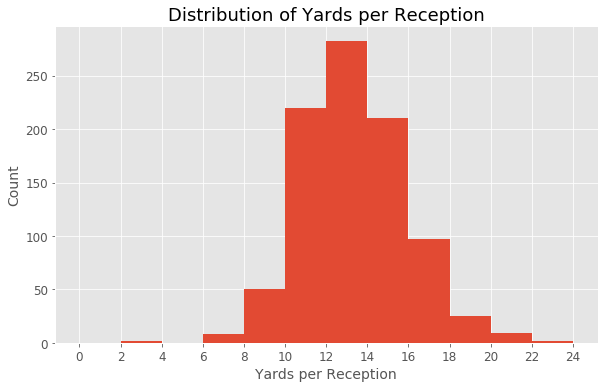

In [34]:
eda_viz.ypr_distribution(savefig = True)

In [35]:
rec_stats[rec_stats['Y/R'] >= 22]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
44,DeSean Jackson*,PHI,24,WR,14,14,95,47,49.5%,1056,22.5,6,32,91,11.1,3.4,75.4,4,2010
254,Joe Morgan,NOR,24,wr,14,5,21,10,47.6%,379,37.9,3,9,80,18.0,0.7,27.1,0,2012
344,Ladarius Green,SDG,23,WR,16,10,30,17,56.7%,376,22.1,3,15,60,12.5,1.1,23.5,0,2013


In [36]:
rec_stats[rec_stats['Y/R'] < 4]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
255,Lee Smith,BUF,25,wr,16,7,4,4,100.0%,13,3.3,2,3,5,3.3,0.3,0.8,0,2012
711,Tavon Austin,LAR,27,WR,16,9,22,13,59.1%,47,3.6,0,2,13,2.1,0.8,2.9,5,2017


#### Touchdowns
Touchdowns has a heavy right skew, again due to the lower cap, with a peak at 2. The right tail makes sense, as there are very few stars putting up large touchdown numbers. One interesting note is that the number of players with 0 touchdowns is much lower than expected.

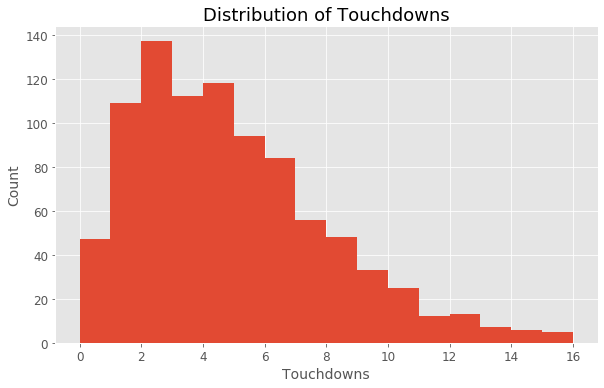

In [37]:
eda_viz.td_distribution(savefig = True)

#### First Downs
First Downs again demonstrates a right skewed normal distribution (peak at around 30), with similar reasoning to the other right skews. When looking at the outliers on the high side, each came from historical wide receiver seasons (Calvin Johnson, Julio Jones, Michael Thomas).

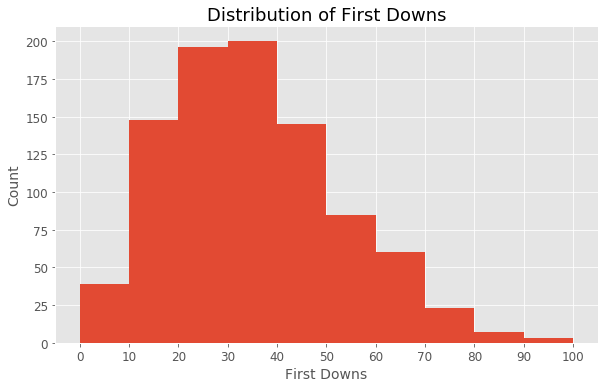

In [38]:
eda_viz.fd_distribution(savefig = True)

In [39]:
rec_stats[rec_stats['1D'] >= 90]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
172,Calvin Johnson *+,DET,27,WR,16,16,204,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012
436,Julio Jones *+,ATL,26,WR,16,16,203,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015
812,Michael Thomas*+,NOR,26,WR,16,15,185,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1,2019


#### Long
The Long distribution is a normal one, with a peak around 50, and some low outliers, both being Lee Smith, who we previously noted had high Catch Rate numbers due to low volume.

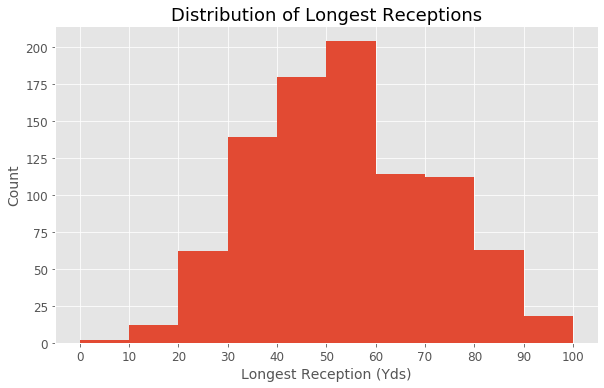

In [40]:
eda_viz.long_distribution(savefig = True)

In [41]:
rec_stats[rec_stats['Lng'] < 10]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
255,Lee Smith,BUF,25,wr,16,7,4,4,100.0%,13,3.3,2,3,5,3.3,0.3,0.8,0,2012
905,Lee Smith,BUF,32,wr,16,5,5,4,80.0%,31,7.8,1,2,9,6.2,0.3,1.9,0,2019


#### Yards per Target
Yards per Target displays a tight normal distribution centered around 8, with two fairly distinct outliers in Joe Morgan on the high side and Tavon Austin on the high side. Both of these players had very low target numbers however, which accounts for these interesting outliers, indicating that there should probably be a lower limit on targets in order to qualify for this stat.

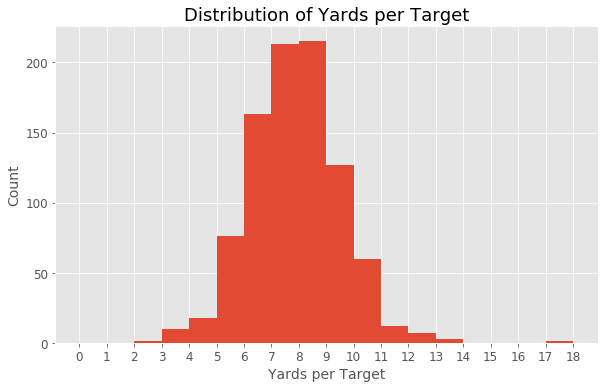

In [42]:
eda_viz.ypt_distribution(savefig = True)

In [43]:
rec_stats[rec_stats['Y/Tgt'] >= 17]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
254,Joe Morgan,NOR,24,wr,14,5,21,10,47.6%,379,37.9,3,9,80,18.0,0.7,27.1,0,2012


In [44]:
rec_stats[rec_stats['Y/Tgt'] < 3]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
711,Tavon Austin,LAR,27,WR,16,9,22,13,59.1%,47,3.6,0,2,13,2.1,0.8,2.9,5,2017


#### Receptions per Game
Receptions per Game displays a right skew like most stats in this dataset (peak at 3), albeit less dramatic than others. The high outliers are all from elite receivers.

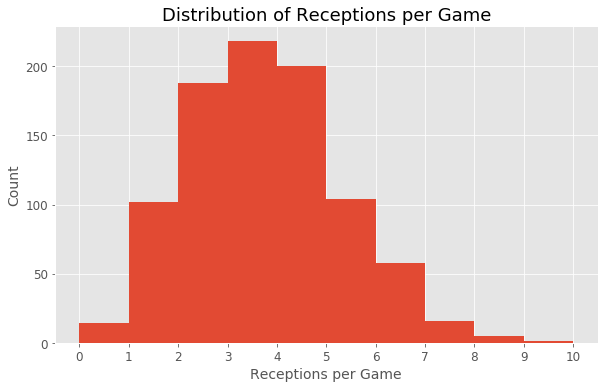

In [45]:
eda_viz.rpg_distribution(savefig = True)

In [46]:
rec_stats[rec_stats['R/G'] >= 8]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
314,Julio Jones,ATL,24,wr,5,5,59,41,69.5%,580,14.1,2,25,81,9.8,8.2,116.0,2,2013
347,Antonio Brown *+,PIT,26,WR,16,16,181,129,71.3%,1698,13.2,13,87,63,9.4,8.1,106.1,2,2014
435,Antonio Brown *+,PIT,27,WR,16,16,193,136,70.5%,1834,13.5,10,84,59,9.5,8.5,114.6,3,2015
436,Julio Jones *+,ATL,26,WR,16,16,203,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015
463,Keenan Allen,SDG,23,WR,8,8,89,67,75.3%,725,10.8,4,34,38,8.1,8.4,90.6,1,2015
812,Michael Thomas*+,NOR,26,WR,16,15,185,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1,2019


#### Receiving Yards per Game
Receiving Yards per Game displays a right skew as well (peak at around 45), with a high outlier for a historic receiving season (Calvin Johnson).

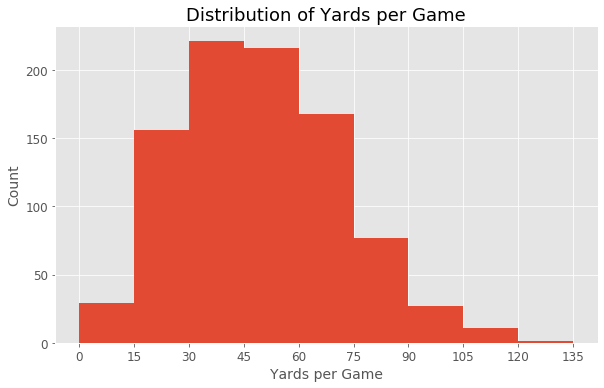

In [47]:
eda_viz.ypg_distribution(savefig = True)

In [48]:
rec_stats[rec_stats['Y/G'] >= 120]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
172,Calvin Johnson *+,DET,27,WR,16,16,204,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012


#### Fumbles
Fumbles display a inverse relationship, which is expected. However, there are several players with very high fumble numbers. Upon investigation however, many of the fumbles recorded were on special teams plays (e.g. punt returns). Therefore, including this statistic in this analysis will overly punish players asked to play special teams, and it might be cut from this dataset, as most players have negligible fumble counts anyways.

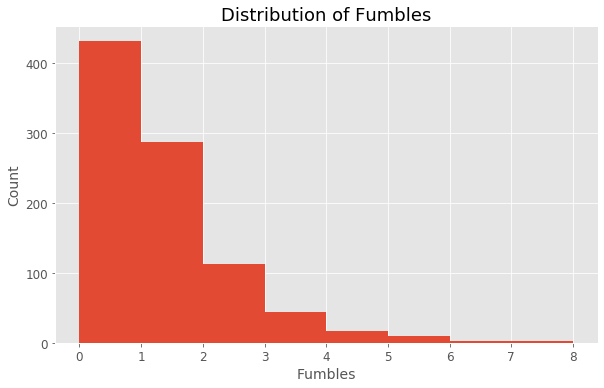

In [49]:
eda_viz.fmb_distribution(savefig = True)

In [50]:
rec_stats[rec_stats['Fmb'] >= 6]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
77,Josh Cribbs,CLE,27,WR,15,5,39,23,59.0%,292,12.7,1,11,65,7.5,1.5,19.5,7,2010
259,Julian Edelman,NWE,27,WR,16,11,151,105,69.5%,1056,10.1,6,54,44,7.0,6.6,66.0,6,2013
360,Jarvis Landry,MIA,22,WR,16,11,112,84,75.0%,758,9.0,5,50,25,6.8,5.3,47.4,7,2014
645,Jamison Crowder,WAS,24,WR,15,6,103,66,64.1%,789,12.0,3,38,41,7.7,4.4,52.6,6,2017


## Advanced Receiver Stats Data
These advanced statistics (courtesy of Football Outsiders) for receivers will be used for the projections of second year jumps. They will need to be trimmed down to only the rookie and second year players for each year. (Note: a Glossary of this dataset's features is available in the reference section)

In [51]:
adv_stats.head()

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
0,M.Wallace,PIT,458,445,49.0%,47.2%,1280,1/38,2010
1,B.Lloyd,DEN,415,402,20.1%,19.1%,1642,8/139,2010
2,G.Jennings,GB,328,327,19.4%,19.4%,1315,2/16,2010
3,R.White,ATL,303,299,8.9%,8.7%,1590,2/27,2010
4,A.Johnson,HOU,281,242,12.9%,9.3%,1309,3/32,2010


### Feature Types
The typing is fairly reasonable, however both `DVOA` as well as `VOA` will need to be changed to floats. `DPI`, which is formatted in *number of penalties/yards*, will most likely need to be split up into two different columns. Additionally the `Player` column is formatted VERY differently from the other two datasets, going with a *firstinitial.lastname* format. This will most likely require the other datasets to be changed to this format, and instead of merging purely on name, merging on name and team.

In [52]:
adv_stats.dtypes

Player    object
Team      object
DYAR       int64
YAR        int64
DVOA      object
VOA       object
EYds       int64
DPI       object
YEAR       int64
dtype: object

### Missingness
There seem to be no missing entries for this dataset, which is in line with initial assumptions.

In [53]:
adv_stats.isnull().mean()

Player    0.0
Team      0.0
DYAR      0.0
YAR       0.0
DVOA      0.0
VOA       0.0
EYds      0.0
DPI       0.0
YEAR      0.0
dtype: float64

### Distribution of Categorical Features

#### Team
Team has a slightly different encoding than the other datasets, as well as being slightly inconsistent. When specifically comparing the encodings between this dataset and the previous two, it can be seen that some edits to the encodings will be required for certain teams.

In [54]:
adv_stats['Team'].nunique()

38

In [55]:
adv_stats['Team'].value_counts()

CLE     55
KC      53
PIT     52
WAS     52
NYJ     51
CIN     51
MIN     50
GB      50
SF      50
NYG     49
CHI     49
ARI     49
OAK     49
TEN     48
BUF     48
NO      47
MIA     47
DEN     46
ATL     46
HOU     46
PHI     46
BAL     46
IND     45
SEA     45
TB      45
JAC     44
DAL     44
DET     43
CAR     42
NE      42
2TM     36
STL     33
SD      32
LARM    10
LAR      8
JAX      8
LAC      8
LACH     4
Name: Team, dtype: int64

In [56]:
set(receivers['Tm']) - set(adv_stats['Team'])

{'GNB', 'KAN', 'NOR', 'NWE', 'SDG', 'SFO', 'TAM'}

In [57]:
set(adv_stats['Team']) - set(receivers['Tm'])

{'2TM', 'GB', 'JAC', 'KC', 'LACH', 'LARM', 'NE', 'NO', 'SD', 'SF', 'TB'}

### Distribution of Numeric Features

#### DYAR (Defense-adjusted Yards Above Replacement)
DYAR has a fairly normal distribution with a peak in the 0-100 bin. It has a few outliers at the high end, with star players such as Calvin Johnson, Jordy Nelson, Antonio Brown, and Michael Thomas, and one outlier on the low end in Tavon Austin.

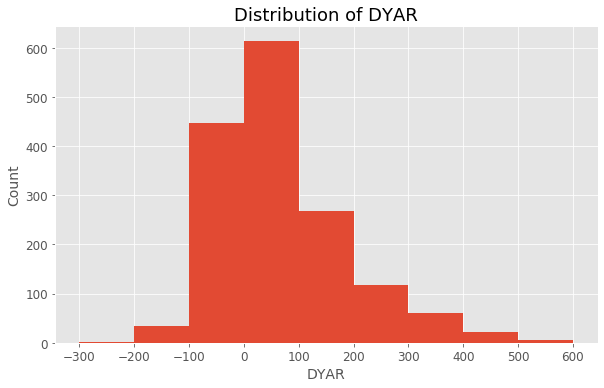

In [58]:
eda_viz.dyar_distribution(savefig = True)

In [59]:
adv_stats[adv_stats['DYAR'] >= 500]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
146,C.Johnson,DET,570,577,31.9%,32.5%,1881,3/67,2011
147,J.Nelson,GB,517,525,52.5%,53.5%,1408,2/40,2011
603,A.Brown,PIT,554,525,25.7%,23.7%,1992,5/97,2014
762,A.Brown,PIT,517,490,19.7%,18.0%,2061,7/196,2015
1402,M.Thomas,NO,538,537,23.9%,23.8%,1993,3/46,2019


In [60]:
adv_stats[adv_stats['DYAR'] < -200]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
1018,T.Austin,LARM,-219,-199,-39.1%,-36.6%,352,2/43,2016


#### YAR (Yards Above Replacement)
YAR has a similarly shaped distribution as DYAR (with a peak again in the 0-100 bin), which is to be expected as it is essentially the same statistic, except not accounting for the defenses played. Something interesting to note, however, is that Tavon Austin does not appear as an extremely low outlier, as he most likely played fairly poorly, but his performance was even worse when taking into account his opponents. Additionally, Randall Cobb appears as a high outlier where he didn't in terms of DYAR, and an Antonio Brown season does not when he did in terms of DYAR.

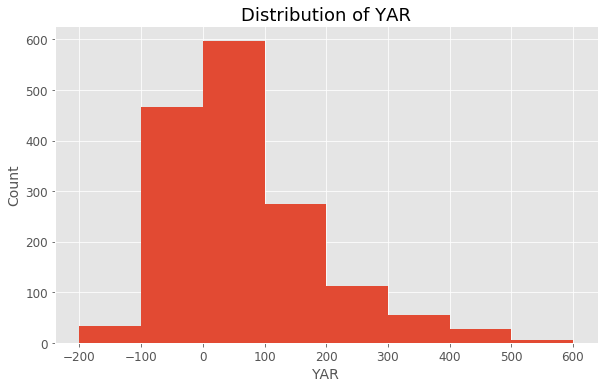

In [61]:
eda_viz.yar_distribution(savefig = True)

In [62]:
adv_stats[adv_stats['YAR'] >= 500]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
146,C.Johnson,DET,570,577,31.9%,32.5%,1881,3/67,2011
147,J.Nelson,GB,517,525,52.5%,53.5%,1408,2/40,2011
603,A.Brown,PIT,554,525,25.7%,23.7%,1992,5/97,2014
606,R.Cobb,GB,479,501,35.7%,37.8%,1514,1/44,2014
1402,M.Thomas,NO,538,537,23.9%,23.8%,1993,3/46,2019


#### DVOA (Defense-adjusted Value Over Average)
DVOA displays a normal distribution (peak in the -10-0 bin), with outliers on both ends. On the upper end, there are receivers with seemingly small sample sizes (based on their EYds numbers), in Kelley Washington and Marvin Hall. On the lower end of the spectrum, Stanley Morgan has the lowest DVOA, but not by as big of a gap. 

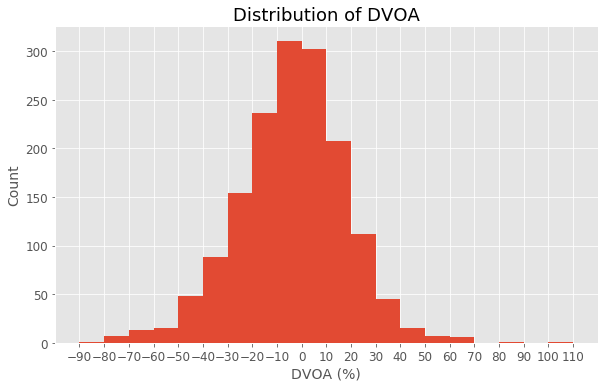

In [63]:
eda_viz.dvoa_distribution(savefig = True)

In [64]:
adv_stats[pd.to_numeric(adv_stats['DVOA'].str.replace('%', '')) >= 80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
90,K.Washington,SD,96,97,80.7%,81.4%,226,0/0,2010
1489,M.Hall,DET,98,101,108.2%,112.1%,211,0/0,2019


In [65]:
adv_stats[pd.to_numeric(adv_stats['DVOA'].str.replace('%', '')) < -80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
1560,S.Morgan,CIN,-53,-55,-82.5%,-86.1%,-16,0/0,2019


#### VOA (Value Over Average)
VOA follows the same distribution pattern as DVOA as expected (peak in the -20-0 bin), with slightly more spread, but with the same upper outliers as DVOA. However, the lower outliers, in addition to Stanley Morgan, Donte Moncrief and Travis Benjamin also make an appearance, receivers with much larger names than Morgan.

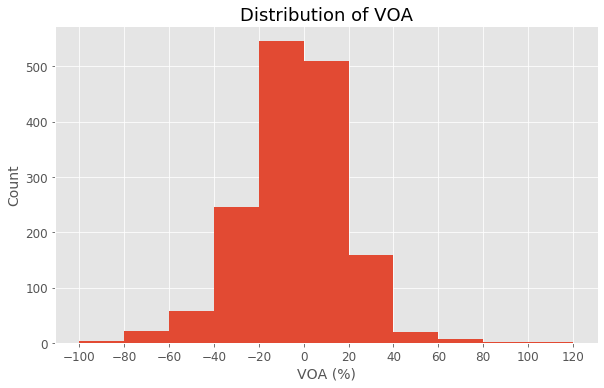

In [66]:
eda_viz.voa_distribution(savefig = True)

In [67]:
adv_stats[pd.to_numeric(adv_stats['VOA'].str.replace('%', '')) >= 80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
90,K.Washington,SD,96,97,80.7%,81.4%,226,0/0,2010
1489,M.Hall,DET,98,101,108.2%,112.1%,211,0/0,2019


In [68]:
adv_stats[pd.to_numeric(adv_stats['VOA'].str.replace('%', '')) < -80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
1560,S.Morgan,CIN,-53,-55,-82.5%,-86.1%,-16,0/0,2019
1562,D.Moncrief,PIT,-71,-89,-76.3%,-91.9%,-14,0/0,2019
1564,T.Benjamin,LAC,-84,-87,-78.9%,-81.5%,-21,0/0,2019


#### Effective Yards
EYds has an inverse distribution (peak in the 0-250 bin), with a very small amount of negative entries. In terms of outliers on the high end, elite receivers Antonio Brown and Calvin Johnson make an appearance.

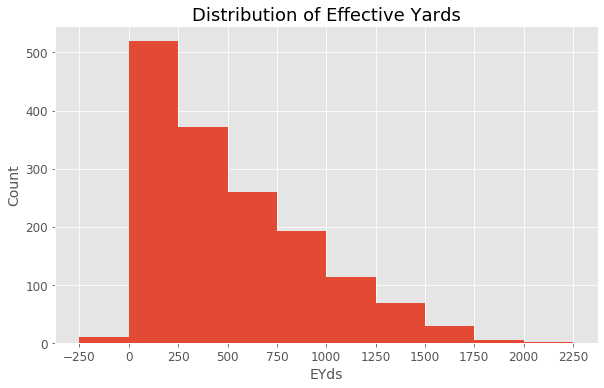

In [69]:
eda_viz.eyds_distribution(savefig = True)

In [70]:
adv_stats[adv_stats['EYds'] >= 2000]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
295,C.Johnson,DET,451,437,14.7%,13.8%,2008,5/102,2012
762,A.Brown,PIT,517,490,19.7%,18.0%,2061,7/196,2015


In [71]:
adv_stats[adv_stats['EYds'] < 0]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
281,C.Hall,PHI,-40,-36,-70.0%,-64.4%,-2,0/0,2011
286,C.Gates,MIA,-55,-57,-74.8%,-77.8%,-9,0/0,2011
755,D.Archer,PIT,-45,-47,-74.0%,-75.8%,-7,0/0,2014
761,D.Nelson,NYJ,-76,-71,-74.4%,-70.8%,-12,0/0,2014
1237,T.Austin,LARM,-99,-98,-68.2%,-67.9%,-1,0/0,2017
1239,B.Perriman,BAL,-158,-150,-71.8%,-68.6%,-16,0/0,2017
1560,S.Morgan,CIN,-53,-55,-82.5%,-86.1%,-16,0/0,2019
1562,D.Moncrief,PIT,-71,-89,-76.3%,-91.9%,-14,0/0,2019
1564,T.Benjamin,LAC,-84,-87,-78.9%,-81.5%,-21,0/0,2019
1566,P.Campbell,IND,-104,-88,-73.4%,-64.4%,-14,0/0,2019
